# Layer-wise

## Setup

activate `firing_rate`

In [1]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/sfn_2023"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config
from src.nodes.postpro.accuracy import get_sorting_accuracies
from src.nodes.study import spikestats

# npx-32
EXPERIMENT = "silico_neuropixels"
SIMULATION_DATE = "2023_10_13"
data_conf, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()
RECORDING_PATH = data_conf["preprocessing"]["output"]["trace_file_path"]
SORTING_PATH = data_conf["sorting"]["sorters"]["kilosort3"]["output"]
GT_SORTING_PATH = data_conf["sorting"]["simulation"]["ground_truth"]["output"]


# npx-384
# EXPERIMENT = "silico_neuropixels"
# SIMULATION_DATE = "2023_08_17"
# data_conf_384, _ = get_config(EXPERIMENT, SIMULATION_DATE).values()
# npx384_RECORDING_PATH = data_conf_384["preprocessing"]["output"]["trace_file_path"]
# npx384_KS3_SORTING_PATH = data_conf_384["sorting"]["sorters"]["kilosort3"]["output"]
# npx384_GT_SORTING_PATH = data_conf_384["sorting"]["simulation"]["ground_truth"]["output"]

2023-09-19 14:47:17,425 - root - utils.py - get_config - INFO - Reading experiment config.
2023-09-19 14:47:17,486 - root - utils.py - get_config - INFO - Reading experiment config. - done
2023-09-19 14:47:17,488 - root - utils.py - get_config - INFO - Reading experiment config.
2023-09-19 14:47:17,504 - root - utils.py - get_config - INFO - Reading experiment config. - done
2023-09-19 14:47:17,505 - root - utils.py - get_config - INFO - Reading experiment config.
2023-09-19 14:47:17,603 - root - utils.py - get_config - INFO - Reading experiment config. - done
2023-09-19 14:47:17,620 - root - utils.py - get_config - INFO - Reading experiment config.
2023-09-19 14:47:17,754 - root - utils.py - get_config - INFO - Reading experiment config. - done


In [2]:
# takes 2 min

# get buccino accuracies
bucci_accuracies = get_sorting_accuracies(BUCCI_GT_SORTING_PATH, BUCCI_KS3_SORTING_PATH)
bucci_acc_array = np.array(bucci_accuracies)

# get janelia accuracies
janel_accuracies = get_sorting_accuracies(JANEL_GT_SORTING_PATH, JANEL_KS3_SORTING_PATH)
janel_acc_array = np.array(janel_accuracies)

# get npx32 accuracies
npx32_accuracies = get_sorting_accuracies(npx32_GT_SORTING_PATH, npx32_SORTING_PATH)
npx32_acc_array = np.array(npx32_accuracies)

# get npx384 accuracies
npx384_accuracies = get_sorting_accuracies(npx384_GT_SORTING_PATH, npx384_KS3_SORTING_PATH)
npx384_acc_array = np.array(npx384_accuracies)

/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.97.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: Use

### Spike count

/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(


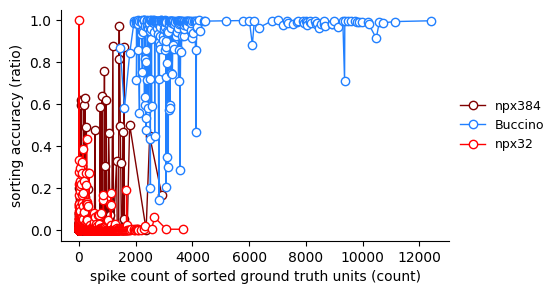

In [3]:
fig, axes =  plt.subplots(1,1, figsize=(5,3))

# rates = spikestats.compute_sorted_spike_rate_for_unit_ids_npx(npx384_accuracies.index, data_conf_384, npx384_RECORDING_PATH, npx384_GT_SORTING_PATH, [], save=False)
spike_count = spikestats.get_spike_count_for_unit_ids_npx(npx32_accuracies.index, data_conf_32, npx32_GT_SORTING_PATH, [], save=False)
df = pd.DataFrame(index=npx32_accuracies.index, data=np.vstack([npx32_accuracies.values, spike_count]).T, columns=["accuracies","spike_count"])
data = df.sort_values(by="spike_count")
plt.plot(data["spike_count"].values, data["accuracies"].values, "-", marker="o", color=[.5,0,0], markerfacecolor="w", label="npx384", markersize=6, linewidth=1);

# rates = spikestats.compute_sorted_spike_rate_for_unit_ids_npx(npx384_accuracies.index, data_conf, npx384_RECORDING_PATH, npx384_GT_SORTING_PATH, [], save=False)
spike_count = spikestats.get_spike_count_for_unit_ids_npx(bucci_accuracies.index, data_conf_bucci, BUCCI_GT_SORTING_PATH, [], save=False)
df = pd.DataFrame(index=bucci_accuracies.index, data=np.vstack([bucci_accuracies.values, spike_count]).T, columns=["accuracies", "spike_count"])
data = df.sort_values(by="spike_count")
plt.plot(data["spike_count"].values, data["accuracies"].values, "-", marker="o", color=(.13,.50, 1), markerfacecolor="w", label="Buccino", linewidth=1);

# rates = spikestats.compute_sorted_spike_rate_for_unit_ids_npx(npx384_accuracies.index, data_conf_384, npx384_RECORDING_PATH, npx384_GT_SORTING_PATH, [], save=False)
spike_count = spikestats.get_spike_count_for_unit_ids_npx(npx384_accuracies.index, data_conf_384, npx384_GT_SORTING_PATH, [], save=False)
df = pd.DataFrame(index=npx384_accuracies.index, data=np.vstack([npx384_accuracies.values, spike_count]).T, columns=["accuracies","spike_count"])
data = df.sort_values(by="spike_count")
plt.plot(data["spike_count"].values, data["accuracies"].values, "-", marker="o", color=[1,0,0], markerfacecolor="w", label="npx32", linewidth=1);


# legend
axes.spines[["right", "top"]].set_visible(False);
axes.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9);
axes.set_xlabel("spike count of sorted ground truth units (count)");
axes.set_ylabel("sorting accuracy (ratio)");


# save figures
plt.savefig("figures/3_bias/pdf/accuracy_vs_spike_count.pdf")
plt.savefig("figures/3_bias/svg/accuracy_vs_spike_count.svg")

### Firing rate

/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/binaryrecordingextractor.py:77: UserWarning: `num_chan` is to be deprecated in version 0.100, please use `num_channels` instead
  warnings.warn("`num_chan` is to be deprecated in version 0.100, please use `num_channels` instead")
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/envs/firing_rate/lib/python3.9/site-packages/spikeinterface/core/base.py:998: UserWarning: Versions are not the same. This might lead compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj68/scratch/laquitai/2_bernstein_2023/env

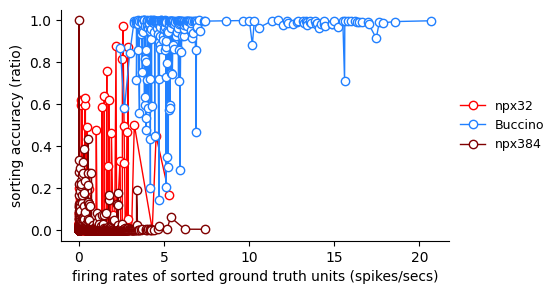

In [3]:
fig, axes =  plt.subplots(1,1, figsize=(5,3))

# npx32
rate_32 = spikestats.compute_sorted_spike_rate_for_unit_ids_npx(npx32_accuracies.index, data_conf_32, npx32_RECORDING_PATH, npx32_GT_SORTING_PATH, [], save=False)
df = pd.DataFrame(index=npx32_accuracies.index, data=np.vstack([npx32_accuracies.values, rate_32]).T, columns=["accuracies","rate"])
data = df.sort_values(by="rate")
plt.plot(data["rate"].values, data["accuracies"].values, "-", marker="o", color=[1,0,0], markerfacecolor="w", label="npx32", markersize=6, linewidth=1);

# buccino
rate_bucci = spikestats.compute_sorted_spike_rate_for_unit_ids_npx(bucci_accuracies.index, data_conf_bucci, bucci_RECORDING_PATH, BUCCI_GT_SORTING_PATH, [], save=False)
df = pd.DataFrame(index=bucci_accuracies.index, data=np.vstack([bucci_accuracies.values, rate_bucci]).T, columns=["accuracies", "rate"])
data = df.sort_values(by="rate")
plt.plot(data["rate"].values, data["accuracies"].values, "-", marker="o", color=(.13,.50, 1), markerfacecolor="w", label="Buccino", linewidth=1);

# npx384
rate_384 = spikestats.compute_sorted_spike_rate_for_unit_ids_npx(npx384_accuracies.index, data_conf_384, npx384_RECORDING_PATH, npx384_GT_SORTING_PATH, [], save=False)
df = pd.DataFrame(index=npx384_accuracies.index, data=np.vstack([npx384_accuracies.values, rate_384]).T, columns=["accuracies","rate"])
data = df.sort_values(by="rate")
plt.plot(data["rate"].values, data["accuracies"].values, "-", marker="o", color=[.5,0,0], markerfacecolor="w", label="npx384", linewidth=1);

# legend
axes.spines[["right", "top"]].set_visible(False);
axes.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9);
axes.set_xlabel("firing rates of sorted ground truth units (spikes/secs)");
axes.set_ylabel("sorting accuracy (ratio)");


# save figures
plt.savefig("figures/3_bias/pdf/accuracy_vs_rate.pdf")
plt.savefig("figures/3_bias/svg/accuracy_vs_rate.svg")